Create a spark session and load the Housing Data set

In [0]:
from pyspark.sql import SparkSession


In [0]:
# File location and type
file_location = "/FileStore/tables/red_or_white_wine-6.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
 
# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
 

Data pre-processing

In [0]:
# Import the required libraries
 
from pyspark.sql.functions import datediff,date_format,to_date,to_timestamp

In [0]:
import pyspark.sql.functions as f

In [0]:
df=df.withColumn('type',df.type.cast('integer'))

In [0]:
data = df.select(['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol',
'quality',
'type'
])

In [0]:
df.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)
 |-- type: integer (nullable = true)



In [0]:
df=df.dropna()

In [0]:
print((df.count(),len(df.columns)))

(0, 13)


In [0]:
# Create a 70-30 train test split
 
train_data,test_data=data.randomSplit([0.7,0.3])

In [0]:
print((train_data.count(),len(train_data.columns)))

(4604, 13)


In [0]:
print((test_data.count(),len(test_data.columns)))

(1893, 13)


In [0]:
# Import the required libraries
 
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler,StringIndexer ,OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

Graphs

In [0]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

In [0]:

# group the data by wine quality and count the number of samples in each quality category
quality_count = data.groupBy("quality").count()

# convert the data to Pandas DataFrame for plotting
quality_count_pd = quality_count.toPandas()

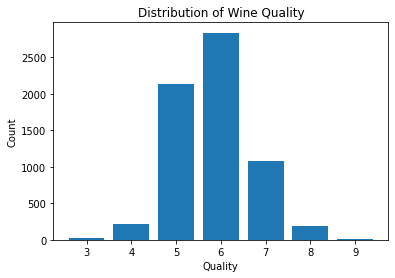

In [0]:
# plot the graph
plt.bar(quality_count_pd["quality"], quality_count_pd["count"])
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

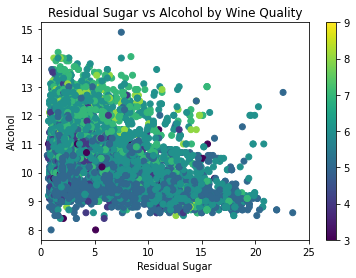

In [0]:
# select the columns of interest
features = ["residual sugar", "alcohol", "quality"]
data = data.select(features)

# convert the data to Pandas DataFrame for plotting
data_pd = data.toPandas()

# plot the graph
plt.scatter(data_pd["residual sugar"], data_pd["alcohol"], c=data_pd["quality"])
plt.title("Residual Sugar vs Alcohol by Wine Quality")
plt.xlabel("Residual Sugar")
plt.ylabel("Alcohol")
plt.colorbar()
plt.xlim(0, 25)
plt.show()

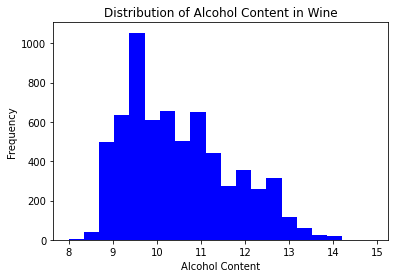

In [0]:

# select the column of interest
alcohol = data.select("alcohol")

# convert the data to Pandas DataFrame for plotting
alcohol_pd = alcohol.toPandas()

# plot the histogram
plt.hist(alcohol_pd["alcohol"], bins=20, color="blue")
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")
plt.title("Distribution of Alcohol Content in Wine")
plt.show()

Find the count of wines with each quality rating

In [0]:
# group by quality rating and count the number of wines
count_by_quality = data.groupBy("quality").count()

# display the results
count_by_quality.show()

+-------+-----+
|quality|count|
+-------+-----+
|      6| 2836|
|      3|   30|
|      5| 2138|
|      9|    5|
|      4|  216|
|      8|  193|
|      7| 1079|
+-------+-----+



compute the minimum, maximum, and average values for each column

In [0]:
min_vals = data.agg(*[F.min(col).alias(col) for col in data.columns if col != "type"])
max_vals = data.agg(*[F.max(col).alias(col) for col in data.columns if col != "type"])
avg_vals = data.agg(*[F.avg(col).alias(col) for col in data.columns if col != "type"])

# show the results
min_vals.show()
max_vals.show()
avg_vals.show()

+--------------+-------+-------+
|residual sugar|alcohol|quality|
+--------------+-------+-------+
|           0.6|    8.0|      3|
+--------------+-------+-------+

+--------------+-------+-------+
|residual sugar|alcohol|quality|
+--------------+-------+-------+
|          65.8|   14.9|      9|
+--------------+-------+-------+

+-----------------+------------------+-----------------+
|   residual sugar|           alcohol|          quality|
+-----------------+------------------+-----------------+
|5.443235339387428|10.491800831149511|5.818377712790519|
+-----------------+------------------+-----------------+

